#TD Python : Algorithme des k plus proches voisins
<br>
<br>
<img src="https://capytale2.ac-paris.fr/web/sites/default/files/2021-11-28-22-10-04//mbn_ADV08830/network.svg" width="200">

# 1. Introduction

L’algorithme des **k plus proches voisins** *(en anglais : k nearest neighbours)* appartient à la famille des algorithmes d’**apprentissage automatique** *(machine learning)*.

L’idée d’apprentissage automatique ne date pas d’hier, puisque le terme de machine learning a été utilisé pour la première fois par l’informaticien américain Arthur Samuel en **1959**. Les algorithmes d’apprentissage automatique ont connu un fort regain d’intérêt au début des années **2000** notamment grâce à la **quantité de données** disponibles sur internet.

Le Machine Learning est une branche de l’**intelligence artificielle** qui a pour but de donner la possibilité aux ordinateurs d’**apprendre**. Un ordinateur n’est pas intelligent, il ne fait qu’exécuter des tâches. On lui décrit sous forme de programmes quoi faire et comment le faire. C’est ce qu’on appelle la **programmation**.

Le **Machine Learning** traite des sujets complexes où la programmation traditionnelle trouve ses limites. Construire un programme qui conduit une voiture serait très complexe voire impossible. Cela étant dû aux nombres infinis des cas possibles à traiter… Le Machine Learning traite cette problématique différemment. Au lieu de décrire quoi faire, le programme **apprendra par lui-même** comment conduire en “observant” des expérimentations.

Machine Learning : Donner la possibilité à l’ordinateur d’**apprendre sans être programmé**.

En fonction des données d’expérimentations que prendra l’algorithme d’apprentissage en entrée, il déduira par lui-même une hypothèse de fonctionnement. Il utilisera cette dernière pour de nouveaux cas, et affinera son expérience au fil du temps.


# 2. Étude d'un exemple : entraînement d'un robot

Exécutez le bloc d'instructions ci-dessous pour avoir un meilleur rendu de la suite de cette actvité :

In [21]:
from IPython.display import HTML
HTML("""
<style>
.pixel {
  image-rendering: pixelated;
  image-rendering: -moz-crisp-edges;
  image-rendering: crisp-edges;
  margin:0px !important;
}
.output_svg{
  display:flex;
  justify-content: space-around;
}
</style>
""")

## 2.1. Objectif

L’objectif de ce TD est de se familiariser avec l’algorithme des **k plus proches voisins** et de trouver une valeur du nombre de voisins k qui minimise les erreurs dans la prise de décision pour **optimiser la navigation du robot**. 

Le principe de base est que l’objectif du robot est de parcourir la plus grande distance **sans percuter un mur**. Le robot est placé dans une arène avec des murs rouges.

Le **capteur** utilisé est une **caméra** intégrée au robot.
<br/>
<br/>
<div class="output_svg">
    <div>
        <img src="https://capytale2.ac-paris.fr/web/sites/default/files/2021-11-28-22-10-52//mbn_ADV08830/robot.jpg" width="300px"/>
        <div style="text-align:center; font-weight:bold;">caméra intégrée dans le robot</div>
    </div>
    <div>
        <img src="https://capytale2.ac-paris.fr/web/sites/default/files/2021-11-28-22-11-39//mbn_ADV08830/arene.jpg" width="300px"/>
        <div style="text-align:center; font-weight:bold;">le robot dans son arène</div>
    </div>
</div>

Les **actions** possibles sont :

* "aller tout droit"
* "tourner à droite"
* "tourner à gauche"

## 2.2. Entraînez le robot

Si vous étiez à la place du robot, **quelles actions feriez-vous** dans les cas suivants ?
<br><br>
<div class="output_svg">
<img src="https://capytale2.ac-paris.fr/web/sites/default/files/2021-11-28-20-50-09//mbn_ADV08830/1.png" width="128px" height="96px" class="pixel" alt="1.png"/>
<img src="https://capytale2.ac-paris.fr/web/sites/default/files/2021-11-28-20-50-13//mbn_ADV08830/2.png" width="128px" height="96px" class="pixel" alt="2.png"/>
<img src="https://capytale2.ac-paris.fr/web/sites/default/files/2021-11-28-20-50-17//mbn_ADV08830/3.png" width="128px" height="96px" class="pixel" alt="3.png"/>
<img src="https://capytale2.ac-paris.fr/web/sites/default/files/2021-11-28-20-50-21//mbn_ADV08830/4.png" width="128px" height="96px" class="pixel" alt="4.png"/>
<img src="https://capytale2.ac-paris.fr/web/sites/default/files/2021-11-28-20-50-29//mbn_ADV08830/5.png" width="128px" height="96px" class="pixel" alt="5.png"/>
<img src="https://capytale2.ac-paris.fr/web/sites/default/files/2021-11-28-20-50-37//mbn_ADV08830/6.png" width="128px" height="96px" class="pixel" alt="6.png"/>
<img src="https://capytale2.ac-paris.fr/web/sites/default/files/2021-11-28-21-02-23//mbn_ADV08830/7.png" width="128px" height="96px" class="pixel" alt="7.png"/>
<img src="https://capytale2.ac-paris.fr/web/sites/default/files/2021-11-28-20-50-46//mbn_ADV08830/8.png" width="128px" height="96px" class="pixel" alt="8.png"/>
</div>

Pour répondre à cette question, **complétez les points de suspension** ci-dessous par le texte de l'action **("aller tout droit", "tourner à droite" ou "tourner à gauche")** :


In [22]:
# Votre code ici :
images=[
    {"nom":"1.png", "action":"tourner à droite"}, 
    {"nom":"2.png", "action":...}, 
    {"nom":"3.png", "action":...},  
    {"nom":"4.png", "action":...},  
    {"nom":"5.png", "action":...},  
    {"nom":"6.png", "action":...},  
    {"nom":"7.png", "action":...},  
    {"nom":"8.png", "action":...}]

In [23]:
# SOLUTION :
images = [{'nom': '1.png', 'action': "tourner à droite"}, 
          {'nom': '2.png', 'action': "aller tout droit"}, 
          {'nom': '3.png', 'action': "aller tout droit"}, 
          {'nom': '4.png', 'action': "tourner à droite"}, 
          {'nom': '5.png', 'action': "tourner à gauche"}, 
          {'nom': '6.png', 'action': "tourner à gauche"}, 
          {'nom': '7.png', 'action': "tourner à gauche"},  
          {'nom': '8.png', 'action': "tourner à gauche"}]

In [24]:
# Test
for dico in images:
    assert (dico["action"] in ("aller tout droit", "tourner à droite", "tourner à gauche")), "La valeur saisie pour " + dico["nom"] + " est invalide."
print("Tout est OK.")

Tout est OK.


## 2.3. Analysez l'image filmée par le robot

L’image issue de la caméra est de taille 64*48 pixels. 

Pour pouvoir prendre la décision dans tous les cas possibles, il faut obtenir la valeur numérique des composantes des pixels de l'image. 

Exécutez les instructions ci-dessous pour **importer la première** :

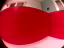

In [25]:
from PIL import Image

nomFichier="1.png"
Image.open(nomFichier)

### 2.3.1 En niveaux de gris

Pour **simplifier** le traitement, on peut obtenir une image en **niveaux de gris** en parcourant chaque pixel et en remplaçant les valeurs des composantes rouge, verte et bleue par : 

$$ gris = \frac{rouge+vert+bleu}{3} $$

Exécutez les instructions ci-dessous pour obtenir l'image en niveaux de gris :

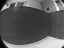

In [26]:
def transformerEnGris(nomFichier):
    image1 = Image.open(nomFichier)
    image2 = Image.new('RGB',(64,48))
    for x in range(64):
        for y in range(48):
            r,v,b = image1.getpixel((x, y)) # r,v,b prennent les valeurs des composante RVB du pixel (x,y) de image1
            g = int((r+v+b)/3)
            image2.putpixel((x, y),(g,g,g)) # On fixe la couleur du pixel (x,y) de image2
    return image2

transformerEnGris(nomFichier)

### 2.3.2 Avec un meilleur contraste

Une image plus contrastée est obtenue en ignorant la composante rouge (présente à la fois dans les tons rouges et les tons blancs). La formule serait donc plutôt :

$$ gris = \frac{vert+bleu}{2} $$

Copiez/collez puis modifiez la fonction `transformerEnGris` pour obtenir une meilleure image en niveaux de gris :

In [27]:
# Votre code ici :


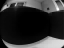

In [28]:
# SOLUTION :
def transformerEnGris(nomFichier):
    image1 = Image.open(nomFichier)
    image2 = Image.new('RGB',(64,48))
    for x in range(64):
        for y in range(48):
            r,v,b = image1.getpixel((x, y))
            g = int((v+b)/2)
            image2.putpixel((x, y),(g,g,g))
    return image2

transformerEnGris(nomFichier)

## 2.3. Définissez deux zones dans l'image

Pour simplifier le problème, nous ne prendrons en compte que la moyenne du niveau de gris de deux zones de l'image dont les positions sont définies par la figure suivante :

<img src="https://capytale2.ac-paris.fr/web/sites/default/files/2021-11-02-14-26-47//mbn_ADV08830/image010.png" width="600px"/>

### 2.3.1. Isolez la zone de gauche

Exécutez les instructions ci-dessous pour isoler la zone de gauche :

In [29]:
def isoler(nomFichier, xDebut, yDebut):
    image1 = transformerEnGris(nomFichier)
    gauche = Image.new('RGB',(13,13))
    for x in range(13):
        for y in range(13):
            r,v,b = image1.getpixel((xDebut+x, yDebut+y))
            gauche.putpixel((x, y),(r,v,b))
    return gauche

isoler(nomFichier, 10, 28)

### 2.3.2. Moyenne du niveau de gris de la zone de gauche

Créez une fonction `moyenne` qui :

* prend en paramètre une image (celle renvoyée par la fonction `isoler`)
* renvoie la valeur moyenne du niveau de gris des pixels de cette image.

In [30]:
# Votre code ici :


In [31]:
# SOLUTION :
def moyenne(image):
    sommeGauche = 0
    for x in range(13):
        for y in range(13):
            r,v,b = image.getpixel((x, y))
            sommeGauche += r
    return sommeGauche / (13*13)

gauche = isoler(nomFichier, 10, 28)
moyenne(gauche)

5.923076923076923

### 2.3.3. Isolez la zone de droite

Ecrivez ci-dessous une instruction pour isoler la zone de droite :

In [32]:
# Votre code ici :


In [33]:
# SOLUTION :
isoler(nomFichier, 42, 28)

### 2.3.4. Moyenne du niveau de gris de la zone de droite

Ecrivez ci-dessous des instructions pour afficher la valeur moyenne du niveau de gris des pixels de la zone de droite :

In [34]:
# Votre code ici :


In [35]:
# SOLUTION :
droite = isoler(nomFichier, 42, 28)
moyenne(droite)

52.798816568047336

### 2.3.5. Récapitulatif des deux zones

Affichons les deux zones sur la même image :

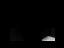

In [36]:
def afficherZones(nomFichier):
    image=Image.new('RGB',(64,48))
    image.paste(isoler(nomFichier, 10, 28), (10, 28))
    image.paste(isoler(nomFichier, 42, 28), (42, 28))
    return image

Image.open(nomFichier).show()
afficherZones(nomFichier)

## 2.4. Représentez sur un graphique

### 2.4.1. Un premier point pour la première image

Affichons sur un graphique un point ayant :

* pour ordonnée la moyenne du niveau de gris de la zone gauche
* pour abscisse la moyenne du niveau de gris de la zone droite

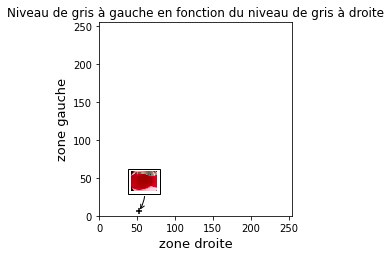

In [37]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from matplotlib.cbook import get_sample_data

def ajouterPoint(nomFichier, action=None, annotations=True, marqueur='+'):
    x=moyenne(isoler(nomFichier, 42, 28))
    y=moyenne(isoler(nomFichier, 10, 28))
    couleur={}
    couleur["aller tout droit"]="red"
    couleur["tourner à gauche"]="green"
    couleur["tourner à droite"]="blue"
    c="black"
    if action :
        c = couleur[action]
    fig=plt.scatter(x, y, color=c, marker = marqueur, label=action)
    fig.axes.set_xlim(0, 255)
    fig.axes.set_ylim(0, 255)
    fig.axes.set_aspect('equal')
    if annotations:
        arr_img = plt.imread(nomFichier, format='png')

        imagebox = OffsetImage(arr_img, zoom=0.4)
        imagebox.image.axes = fig.axes

        ab = AnnotationBbox(imagebox, xy = (x, y),
                            xybox=(5., 30.),
                            xycoords='data',
                            boxcoords="offset points",
                            pad=0.3,
                            arrowprops=dict(
                                arrowstyle="->",
                                connectionstyle="arc3,rad=-0.2")
                            )

        fig.axes.add_artist(ab)

def afficherGraphique():
    plt.xlabel("zone droite", size = 13,)
    plt.ylabel("zone gauche", size = 13)
    plt.title("Niveau de gris à gauche en fonction du niveau de gris à droite")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show() 

plt.clf()
ajouterPoint(nomFichier)
afficherGraphique()

### 2.4.2. Pour toutes les images

Affichons les points correspondant à toutes les images :

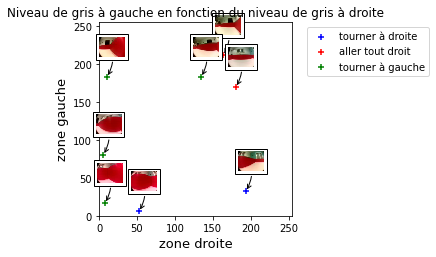

In [39]:
def ajouterTousLesPoints(annotations=True):
    plt.clf()
    for element in images:
        ajouterPoint(element["nom"],element["action"], annotations)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0), loc='upper left')

ajouterTousLesPoints()
afficherGraphique()

# 3. L’algorithme des k plus proches voisins

## 3.1. Ajout d’une donnée non labellisée

### 3.1.1. Avec prédiction intuitive

Le graphique obtenu précédemment montre que les 3 actions ("aller tout droit", "aller à gauche" et "aller à droite") sont bien séparées. On peut alors ajouter une donnée non labellisée n’appartenant pas à l’ensemble d’origine :

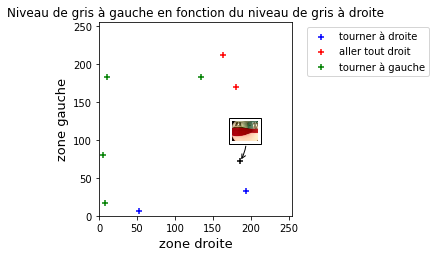

In [40]:
ajouterTousLesPoints(False)

nomFichierTest="test1.png"
Image.open(nomFichierTest).show()

ajouterPoint(nomFichierTest)
afficherGraphique()

Dans l’exemple ci-dessus on peut facilement déterminer l’action à effectuer.

### 3.1.2. Cas plus difficile...

Dans certains cas il est un peu plus difficile de se prononcer ”au premier coup d'oeil” :

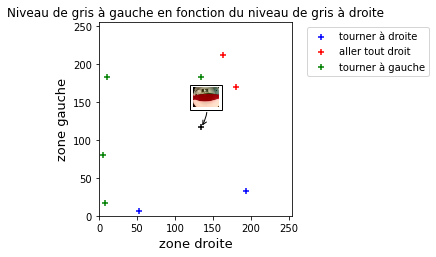

In [41]:
ajouterTousLesPoints(False)

nomFichierTest="test2.png"
Image.open(nomFichierTest).show()

ajouterPoint(nomFichierTest)
afficherGraphique()

À partir de l’exemple ci-dessus, on souhaite proposer une méthode permettant de traiter ce genre de cas litigieux. 

## 3.2. L'algorithme

Solution proposée par l’algorithme des k plus proches voisins :

* on calcule la distance entre notre point et chaque point issu des autres images (à chaque fois c’est un calcul de distance entre 2 points tout ce qu’il y a de plus classique) ;
* on sélectionne uniquement les k distances les plus petites (les k plus proches voisins) ;
* parmi les k plus proches voisins, on détermine quelle est l'action. On associe à notre ”image mystère” cette ”action majoritaire parmi les k plus proches voisins”.

Dans l’exemple évoqué ci-dessus, pour k=3, nous obtenons :

Si le robot capte cette image, il y a une ”forte” probabilité que l'action à faire soit : ...

### 3.2.1. Le calcul de distance (ou plutôt de son carré)

Définir une fonction nommée `carreDistance` qui prend en paramètre deux noms de fichiers images `image1` et `image2` et qui renvoie d² (de type `float`) : le carré de la distance qui sépare leurs points respectifs.

*Aide : Utilisez le théorème de Pythagore.*

In [42]:
# Votre code ici :


In [43]:
# SOLUTION :
def carreDistance(image1,image2):
    x1=moyenne(isoler(image1, 42, 28))
    y1=moyenne(isoler(image1, 10, 28))
    x2=moyenne(isoler(image2, 42, 28))
    y2=moyenne(isoler(image2, 10, 28))
    return (x2-x1)**2 + (y2-y1)**2

In [44]:
carreDistance(nomFichierTest,"1.png")

19005.2822030041

Observez le résultat pour chaque image en exécutant le code suivant :

In [45]:
for element in images:
    element["d2"]=carreDistance(nomFichierTest,element["nom"])
images

[{'action': 'tourner à droite', 'd2': 19005.2822030041, 'nom': '1.png'},
 {'action': 'aller tout droit', 'd2': 9831.505374461676, 'nom': '2.png'},
 {'action': 'aller tout droit', 'd2': 4909.7107944399695, 'nom': '3.png'},
 {'action': 'tourner à droite', 'd2': 10577.642589545183, 'nom': '4.png'},
 {'action': 'tourner à gauche', 'd2': 18004.125660866215, 'nom': '5.png'},
 {'action': 'tourner à gauche', 'd2': 26107.6100276601, 'nom': '6.png'},
 {'action': 'tourner à gauche', 'd2': 4414.02205805119, 'nom': '7.png'},
 {'action': 'tourner à gauche', 'd2': 19859.216869157244, 'nom': '8.png'}]

### 3.2.2. Le tri des données par distance croissante

Mettre en oeuvre le tri par sélection de ces fleurs selon `distanceCarre` croissant en s'arrêtant à la k-ième valeur triée.

La fonction s'appellera `trier()`, prendra en paramètre `k` et ne renverra rien.

In [46]:
# Votre code ici :


In [47]:
# SOLUTION :
def trier(k:int):
    iMin=0
    for i in range(k):
        iMin = i
        for j in range(i+1,len(images)) :
            if images[j]['d2']<images[iMin]['d2'] :
                iMin = j
        if iMin != i :
            temp=images[iMin]
            images[iMin]=images[i]
            images[i]=temp

### 3.2.3. Les k plus proches voisins

Observez les 3 images les plus proches :

In [48]:
k=3
trier(k)
plusProchesImages=images[:3]
print(plusProchesImages)
for element in plusProchesImages:
    Image.open(element["nom"]).show()

[{'nom': '7.png', 'action': 'tourner à gauche', 'd2': 4414.02205805119}, {'nom': '3.png', 'action': 'aller tout droit', 'd2': 4909.7107944399695}, {'nom': '2.png', 'action': 'aller tout droit', 'd2': 9831.505374461676}]


### 3.2.4. Sur le graphique

Exécutez le code suivant pour afficher ces k plus proches voisins sur un graphique :

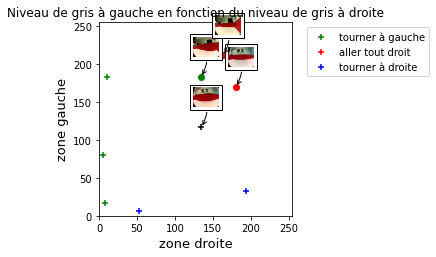

In [49]:
ajouterTousLesPoints(False)

ajouterPoint(nomFichierTest)

for element in plusProchesImages:
    ajouterPoint(element["nom"],element["action"],marqueur="o")

afficherGraphique()

### 3.2.5. Le comptage du "score" des différentes actions

Définir un fonction `compter` sans paramètres, qui compte parmi les `k` plus proches voisins le nombre d'actions de chaque sorte. 

Cette fonction renverra le tableau suivant pour `k=3` :

`{'tourner à gauche': 1, 'aller tout droit': 2}`

In [50]:
# Votre code ici :


In [51]:
def compter():
    imagesVoisines={}
    for element in plusProchesImages:
        if element["action"] not in imagesVoisines:
            imagesVoisines[element["action"]]=1
        else:
            imagesVoisines[element["action"]] +=1
    return imagesVoisines

Exécutez le code suivant pour voir la conformité de votre fonction pour `k=3` :

In [52]:
totaux=compter()
totaux

{'aller tout droit': 2, 'tourner à gauche': 1}

### 3.2.6. La prédiction

Définir un fonction `predire` sans paramètres ni valeur de retour. 

Cette fonction affichera une phrase indiquant l'action à effectuer.

In [53]:
# Votre code ici :


In [54]:
def predire():
    maxi=0
    actionChoisie=None
    for action in totaux:
        if totaux[action]>maxi:
            maxi=totaux[action]
            actionChoisie=action
    print("L'action à effectuer est :",actionChoisie)

In [55]:
predire()

L'action à effectuer est : aller tout droit


Pour aller plus loin, modifiez le programme ci-dessus afin d’étudier les changements induits par la modification du paramètre k (notamment pour k=5).